<a href="https://www.kaggle.com/code/osmanacar/coffee-bean-sales-rfm-cltv-analysis?scriptVersionId=197071689" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Preparation

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)
warnings.simplefilter(action='ignore', category=FutureWarning)


df_orders = pd.read_excel("/kaggle/input/coffee-bean-sales-raw-dataset/Raw Data.xlsx", sheet_name="orders")
df_customers = pd.read_excel("/kaggle/input/coffee-bean-sales-raw-dataset/Raw Data.xlsx",sheet_name="customers")
df_products = pd.read_excel("/kaggle/input/coffee-bean-sales-raw-dataset/Raw Data.xlsx", sheet_name="products")

In [2]:
df_orders.head(10)

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CVP-18956-553,2021-08-04,86561-91660-RB,L-D-1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,IPP-31994-879,2022-01-21,65223-29612-CB,E-D-0.5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SNZ-65340-705,2022-05-20,21134-81676-FR,L-L-0.2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,EZT-46571-659,2019-01-02,03396-68805-ZC,R-M-0.5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NWQ-70061-912,2019-09-05,61021-27840-ZN,R-M-0.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_customers.head(10)

,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,73342-18763-UW,Piotr Bote,pbote1@yelp.com,+353 (913) 396-4653,2112 Ridgeway Hill,Crumlin,Ireland,D6W,No
2,21125-22134-PX,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,71253-00052-RN,Dene Azema,dazema3@facebook.com,+1 (217) 418-0714,27 Maywood Place,Springfield,United States,62711,Yes
4,23806-46781-OU,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No
5,86561-91660-RB,Beryle Cottier,NaN,+1 (570) 289-7473,2651 Stoughton Place,Scranton,United States,18505,No
6,65223-29612-CB,Shaylynn Lobe,slobe6@nifty.com,+1 (937) 954-4541,7005 Mariners Cove Place,Dayton,United States,45440,Yes
7,21134-81676-FR,Melvin Wharfe,NaN,+353 (507) 574-3034,7 Straubel Road,Kill,Ireland,P24,Yes
8,03396-68805-ZC,Guthrey Petracci,gpetracci8@livejournal.com,+1 (310) 868-1842,949 Paget Parkway,Los Angeles,United States,90045,No
9,61021-27840-ZN,Rodger Raven,rraven9@ed.gov,+1 (213) 263-0288,1 Reinke Avenue,Los Angeles,United States,90065,No


In [4]:
df_products.head(10)

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,A-L-0.2,Ara,L,0.2000,3.8850,1.9425,0.3496
1,A-L-0.5,Ara,L,0.5000,7.7700,1.5540,0.6993
2,A-L-1,Ara,L,1.0000,12.9500,1.2950,1.1655
3,A-L-2.5,Ara,L,2.5000,29.7850,1.1914,2.6806
4,A-M-0.2,Ara,M,0.2000,3.3750,1.6875,0.3037
5,A-M-0.5,Ara,M,0.5000,6.7500,1.3500,0.6075
6,A-M-1,Ara,M,1.0000,11.2500,1.1250,1.0125
7,A-M-2.5,Ara,M,2.5000,25.8750,1.0350,2.3287
8,A-D-0.2,Ara,D,0.2000,2.9850,1.4925,0.2686
9,A-D-0.5,Ara,D,0.5000,5.9700,1.1940,0.5373


In [5]:
print(df_orders.isnull().sum())
print("*************************")
print(df_customers.isnull().sum())
print("*************************")
print(df_products.isnull().sum())

Order ID            0
Order Date          0
Customer ID         0
Product ID          0
Quantity            0
Customer Name    1000
Email            1000
Country          1000
Coffee Type      1000
Roast Type       1000
Size             1000
Unit Price       1000
Sales            1000
dtype: int64
*************************
Customer ID         0
Customer Name       0
Email             204
Phone Number      130
Address Line 1      0
City                0
Country             0
Postcode            0
Loyalty Card        0
dtype: int64
*************************
Product ID        0
Coffee Type       0
Roast Type        0
Size              0
Unit Price        0
Price per 100g    0
Profit            0
dtype: int64


In [6]:
nan_columns = ["Customer Name", "Email", "Country", "Coffee Type", "Roast Type", "Size", "Unit Price", "Sales"]
df_orders.drop(nan_columns, axis=1, inplace=True)
df_orders

,Order ID,Order Date,Customer ID,Product ID,Quantity
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2
...,...,...,...,...,...
995,RLM-96511-467,2020-01-06,43014-53743-XK,R-L-2.5,1
996,AEZ-13242-456,2022-05-04,62494-09113-RP,R-M-0.5,5
997,UME-75640-698,2019-10-11,62494-09113-RP,A-M-0.5,4
998,GJC-66474-557,2021-08-03,64965-78386-MY,A-D-1,1


In [7]:
df_or_cus = pd.merge(df_orders, df_customers, on="Customer ID")
df = pd.merge(df_or_cus, df_products, on="Product ID")
df.head()

df_copy = df

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1000 non-null   object        
 1   Order Date      1000 non-null   datetime64[ns]
 2   Customer ID     1000 non-null   object        
 3   Product ID      1000 non-null   object        
 4   Quantity        1000 non-null   int64         
 5   Customer Name   1000 non-null   object        
 6   Email           794 non-null    object        
 7   Phone Number    865 non-null    object        
 8   Address Line 1  1000 non-null   object        
 9   City            1000 non-null   object        
 10  Country         1000 non-null   object        
 11  Postcode        1000 non-null   object        
 12  Loyalty Card    1000 non-null   object        
 13  Coffee Type     1000 non-null   object        
 14  Roast Type      1000 non-null   object        
 15  Size 

In [9]:
df["Email"].fillna(0, inplace=True)
df["Phone Number"].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1000 non-null   object        
 1   Order Date      1000 non-null   datetime64[ns]
 2   Customer ID     1000 non-null   object        
 3   Product ID      1000 non-null   object        
 4   Quantity        1000 non-null   int64         
 5   Customer Name   1000 non-null   object        
 6   Email           1000 non-null   object        
 7   Phone Number    1000 non-null   object        
 8   Address Line 1  1000 non-null   object        
 9   City            1000 non-null   object        
 10  Country         1000 non-null   object        
 11  Postcode        1000 non-null   object        
 12  Loyalty Card    1000 non-null   object        
 13  Coffee Type     1000 non-null   object        
 14  Roast Type      1000 non-null   object        
 15  Size 

In [10]:
df["TotalPrice"] = df["Quantity"] * df["Unit Price"]
df[["Order ID","Customer ID","Quantity","Unit Price","TotalPrice"]]

,Order ID,Customer ID,Quantity,Unit Price,TotalPrice
0,QEV-37451-860,17670-51384-MA,2,9.9500,19.9000
1,QEV-37451-860,17670-51384-MA,5,8.2500,41.2500
2,FAA-43335-268,21125-22134-PX,1,12.9500,12.9500
3,KAC-83089-793,23806-46781-OU,2,13.7500,27.5000
4,KAC-83089-793,23806-46781-OU,2,27.4850,54.9700
...,...,...,...,...,...
995,RLM-96511-467,43014-53743-XK,1,27.4850,27.4850
996,AEZ-13242-456,62494-09113-RP,5,5.9700,29.8500
997,UME-75640-698,62494-09113-RP,4,6.7500,27.0000
998,GJC-66474-557,64965-78386-MY,1,9.9500,9.9500


In [11]:
cat_cols = [col for col in df.columns if str(df[col].dtype) in ["category", "object", "bool"]]
cat_cols

['Order ID',
 'Customer ID',
 'Product ID',
 'Customer Name',
 'Email',
 'Phone Number',
 'Address Line 1',
 'City',
 'Country',
 'Postcode',
 'Loyalty Card',
 'Coffee Type',
 'Roast Type']

In [12]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int64", "float64"]]
num_but_cat

['Quantity', 'Size']

In [13]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
cat_but_car

['Order ID',
 'Customer ID',
 'Product ID',
 'Customer Name',
 'Email',
 'Phone Number',
 'Address Line 1',
 'City',
 'Postcode']

In [14]:
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]
cat_cols

['Country', 'Loyalty Card', 'Coffee Type', 'Roast Type', 'Quantity', 'Size']

In [15]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
num_cols = [col for col in num_cols if col not in cat_cols]
num_cols

['Unit Price', 'Price per 100g', 'Profit', 'TotalPrice']

In [16]:
def cat_summary(dataframe, col_name, plot=False):
    print(
        pd.DataFrame(
            {col_name: dataframe[col_name].value_counts(),
             "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)
             }
        )
    )
    print("**********************************")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

             Coffee Type   Ratio
Coffee Type                     
Ara                  264 26.4000
Lib                  248 24.8000
Exc                  247 24.7000
Rob                  241 24.1000
**********************************


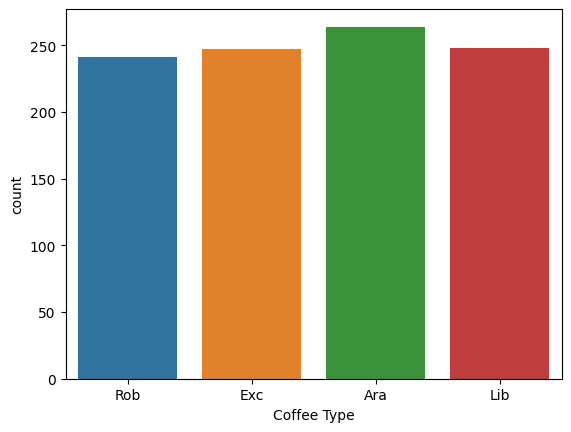

In [17]:
cat_summary(df,"Coffee Type", True)

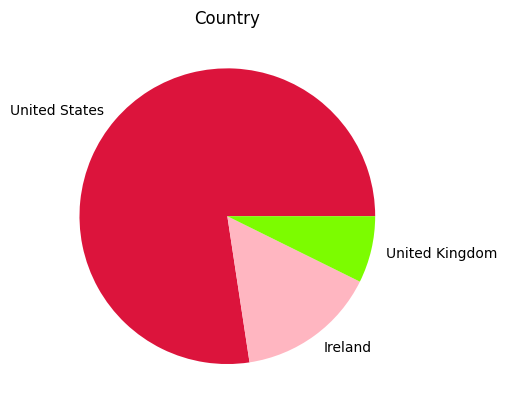

Country
United States     774
Ireland           153
United Kingdom     73
Name: count, dtype: int64

In [18]:
labels = df["Country"].value_counts().index
colors = ["crimson", "lightpink", "lawngreen"]
plt.pie(df["Country"].value_counts(), labels=labels, colors=colors)
plt.title("Country")
plt.show()
df["Country"].value_counts()

# RFM Analysis

In [19]:
print("Last Order Date: ", df["Order Date"].max())
analysis_date = dt.datetime(2022, 8, 21)
print("Analysis Date: ",analysis_date)

Last Order Date:  2022-08-19 00:00:00
Analysis Date:  2022-08-21 00:00:00


In [20]:
rfm = df.groupby("Customer ID").agg(
    {
        "Order Date": lambda order_date: (analysis_date - order_date.max()).days,
        "Order ID": lambda order: order.nunique(),
        "TotalPrice": lambda total_price: total_price.sum()
    }
)

rfm.head()

,Order Date,Order ID,TotalPrice
Customer ID,,,
00246-15080-LE,40,1,178.7100
00256-19905-YG,1310,1,40.5000
00445-42781-KX,114,1,163.7200
00539-42510-RY,903,1,148.9250
00852-54571-WP,407,1,8.2500


In [21]:
rfm.columns = ["recency", "frequency", "monetary"]
rfm.head()

,recency,frequency,monetary
Customer ID,,,
00246-15080-LE,40,1,178.7100
00256-19905-YG,1310,1,40.5000
00445-42781-KX,114,1,163.7200
00539-42510-RY,903,1,148.9250
00852-54571-WP,407,1,8.2500


In [22]:
rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5])

rfm["RF_SCORE"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str)

rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
Customer ID,,,,,,,
00246-15080-LE,40,1,178.7100,5,1,5,51
00256-19905-YG,1310,1,40.5000,1,1,3,11
00445-42781-KX,114,1,163.7200,5,1,5,51
00539-42510-RY,903,1,148.9250,2,1,5,21
00852-54571-WP,407,1,8.2500,4,1,1,41


In [23]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'}

rfm["SEGMENT"] = rfm["RF_SCORE"].replace(seg_map, regex=True)
rfm

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,SEGMENT
Customer ID,,,,,,,,
00246-15080-LE,40,1,178.7100,5,1,5,51,new_customers
00256-19905-YG,1310,1,40.5000,1,1,3,11,hibernating
00445-42781-KX,114,1,163.7200,5,1,5,51,new_customers
00539-42510-RY,903,1,148.9250,2,1,5,21,hibernating
00852-54571-WP,407,1,8.2500,4,1,1,41,promising
...,...,...,...,...,...,...,...,...
99643-51048-IQ,1250,1,20.2500,1,5,2,15,cant_loose
99735-44927-OL,771,1,41.2500,2,5,3,25,cant_loose
99869-55718-UU,758,1,10.7400,3,5,1,35,loyal_customers


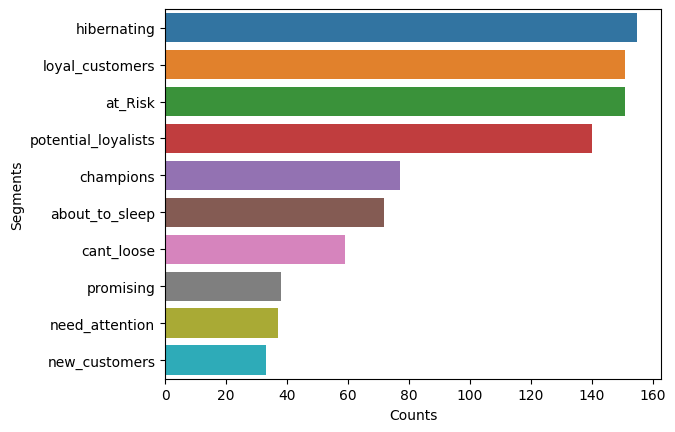

SEGMENT
hibernating            155
loyal_customers        151
at_Risk                151
potential_loyalists    140
champions               77
about_to_sleep          72
cant_loose              59
promising               38
need_attention          37
new_customers           33
Name: count, dtype: int64

In [24]:
seg_count = rfm['SEGMENT'].value_counts()
sns.barplot(x=seg_count.values, y=seg_count.index)
plt.xlabel('Counts')
plt.ylabel('Segments')
plt.show()
seg_count

In [25]:
rfm[["SEGMENT", "recency", "frequency", "monetary"]].groupby("SEGMENT").agg(["mean", "count"])

recency       frequency       monetary      
                         mean count      mean count     mean count
SEGMENT                                                           
about_to_sleep       632.8472    72    1.0000    72  45.0566    72
at_Risk             1046.1656   151    1.0000   151  49.4064   151
cant_loose          1044.4237    59    1.0847    59  48.1836    59
champions            139.5714    77    1.2727    77  54.6788    77
hibernating         1044.6645   155    1.0000   155  48.1605   155
loyal_customers      502.5828   151    1.1192   151  49.6113   151
need_attention       606.1081    37    1.0000    37  50.6595    37
new_customers        129.4242    33    1.0000    33  61.9580    33
potential_loyalists  257.1143   140    1.0000   140  44.3480   140
promising            387.8421    38    1.0000    38  60.3363    38

# CLTV Analysis

In [26]:
pip install lifetimes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

In [28]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [29]:
df_clv = df.copy()
df_clv.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,TotalPrice
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Rob,M,1.0000,9.9500,0.9950,0.5970,19.9000
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Exc,M,0.5000,8.2500,1.6500,0.9075,41.2500
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes,Ara,L,1.0000,12.9500,1.2950,1.1655,12.9500
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Christoffer O' Shea,0,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No,Exc,M,1.0000,13.7500,1.3750,1.5125,27.5000
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Christoffer O' Shea,0,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No,Rob,L,2.5000,27.4850,1.0994,1.6491,54.9700


In [30]:
df_clv.isnull().sum()

Order ID          0
Order Date        0
Customer ID       0
Product ID        0
Quantity          0
Customer Name     0
Email             0
Phone Number      0
Address Line 1    0
City              0
Country           0
Postcode          0
Loyalty Card      0
Coffee Type       0
Roast Type        0
Size              0
Unit Price        0
Price per 100g    0
Profit            0
TotalPrice        0
dtype: int64

In [31]:
replace_with_thresholds(df_clv, "Quantity")
replace_with_thresholds(df_clv, "Unit Price")

In [32]:
print("Last Order Date: ", df["Order Date"].max())
analysis_date = dt.datetime(2022, 8, 21)
print("Analysis Date: ",analysis_date)

Last Order Date:  2022-08-19 00:00:00
Analysis Date:  2022-08-21 00:00:00


In [33]:
cltv = df_clv.groupby("Customer ID").agg({
    "Order Date": [lambda order_date: (order_date.max() - order_date.min()).days,
                   lambda order_date: (analysis_date - order_date.min()).days],
    "Order ID": lambda order_id: order_id.nunique(),
    "TotalPrice": lambda total_price: total_price.sum()
})
cltv

Order Date            Order ID TotalPrice
               <lambda_0> <lambda_1> <lambda>   <lambda>
Customer ID                                             
00246-15080-LE          0         40        1   178.7100
00256-19905-YG          0       1310        1    40.5000
00445-42781-KX          0        114        1   163.7200
00539-42510-RY          0        903        1   148.9250
00852-54571-WP          0        407        1     8.2500
...                   ...        ...      ...        ...
99643-51048-IQ          0       1250        1    20.2500
99735-44927-OL          0        771        1    41.2500
99869-55718-UU          0        758        1    10.7400
99899-54612-NX          0        555        1    66.9300
99978-56910-BN          0       1191        1    22.2750

[913 rows x 4 columns]

In [34]:
cltv.columns = cltv.columns.droplevel(0) 
cltv.columns=['recency', 'T', 'frequency', 'monetary']
cltv

,recency,T,frequency,monetary
Customer ID,,,,
00246-15080-LE,0,40,1,178.7100
00256-19905-YG,0,1310,1,40.5000
00445-42781-KX,0,114,1,163.7200
00539-42510-RY,0,903,1,148.9250
00852-54571-WP,0,407,1,8.2500
...,...,...,...,...
99643-51048-IQ,0,1250,1,20.2500
99735-44927-OL,0,771,1,41.2500
99869-55718-UU,0,758,1,10.7400


In [35]:
cltv["monetary"] = cltv["monetary"] / cltv["frequency"]
cltv = cltv[(cltv['frequency'] > 1)]
cltv["recency_weekly"] =cltv["recency"]/ 7
cltv["T_weekly"] = cltv["T"] / 7
cltv.drop(cltv[["recency", "T"]],axis=1, inplace=True)
cltv.head()

,frequency,monetary,recency_weekly,T_weekly
Customer ID,,,,
01035-70465-UO,2,35.8500,3.4286,146.8571
01841-48191-NL,2,23.4825,0.1429,129.4286
04666-71569-RI,2,16.6550,2.1429,135.4286
05325-97750-WP,4,45.9150,86.0000,127.2857
10142-55267-YO,2,14.2875,4.7143,80.2857


# BG-NBD

In [36]:
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(cltv["frequency"],
        cltv["recency_weekly"],
        cltv["T_weekly"])

<lifetimes.BetaGeoFitter: fitted with 25 subjects, a: 1.08, alpha: 123.94, b: 4.55, r: 4.30>

In [37]:
cltv["expected_purc_1_week"] = bgf.predict(1,
                                               cltv["frequency"],
                                               cltv["recency_weekly"],
                                               cltv["T_weekly"])

cltv["expected_purc_1_month"] = bgf.predict(4 * 1,
                                               cltv["frequency"],
                                               cltv["recency_weekly"],
                                               cltv["T_weekly"])

cltv["expected_purc_3_month"] = bgf.predict(4 * 3,
                                               cltv["frequency"],
                                               cltv["recency_weekly"],
                                               cltv["T_weekly"])

cltv["expected_purc_6_month"] = bgf.predict(4 * 6,
                                               cltv["frequency"],
                                               cltv["recency_weekly"],
                                               cltv["T_weekly"])

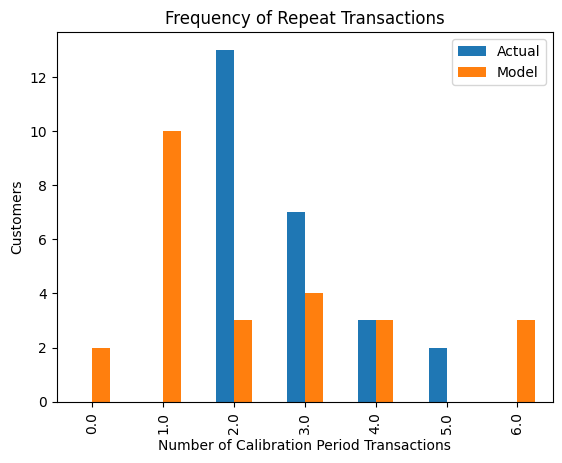

In [38]:
plot_period_transactions(bgf)
plt.show(block=True)

In [39]:
cltv.head()

,frequency,monetary,recency_weekly,T_weekly,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_purc_6_month
Customer ID,,,,,,,,
01035-70465-UO,2,35.8500,3.4286,146.8571,0.0010,0.0039,0.0116,0.0227
01841-48191-NL,2,23.4825,0.1429,129.4286,0.0013,0.0053,0.0158,0.0308
04666-71569-RI,2,16.6550,2.1429,135.4286,0.0013,0.0050,0.0148,0.0288
05325-97750-WP,4,45.9150,86.0000,127.2857,0.0202,0.0803,0.2369,0.4628
10142-55267-YO,2,14.2875,4.7143,80.2857,0.0067,0.0267,0.0786,0.1529


# GAMMA-GAMMA

In [40]:
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv["frequency"], cltv["monetary"])

<lifetimes.GammaGammaFitter: fitted with 25 subjects, p: 3.95, q: 0.76, v: 3.78>

In [41]:
cltv["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv["frequency"],cltv["monetary"])

# CLV Calculating with BG-NBD and GAMMA-GAMMA

In [42]:
cltv["CLTV for 1 months"] = ggf.customer_lifetime_value(bgf,
                                   cltv["frequency"],
                                   cltv["recency_weekly"],
                                   cltv["T_weekly"],
                                   cltv["monetary"],
                                   time=1,  #  month
                                   freq="W",  # W,D,M - frequency
                                   discount_rate=0.01)

cltv["CLTV for 6 months"] = ggf.customer_lifetime_value(bgf,
                                   cltv["frequency"],
                                   cltv["recency_weekly"],
                                   cltv["T_weekly"],
                                   cltv["monetary"],
                                   time=6,  #  month
                                   freq="W",  # W,D,M - frequency
                                   discount_rate=0.01)

In [43]:
cltv.sort_values("CLTV for 6 months",ascending=False).head(10)

,frequency,monetary,recency_weekly,T_weekly,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_purc_6_month,expected_average_profit,CLTV for 1 months,CLTV for 6 months
Customer ID,,,,,,,,,,,
57808-90533-UE,3,83.7083,35.5714,39.0000,0.0375,0.1485,0.4347,0.8395,86.6876,13.8300,75.9676
27930-59250-JT,3,105.6900,149.4286,154.1429,0.0221,0.0879,0.2599,0.5088,109.1142,10.3074,58.0645
32743-78448-KT,2,81.0875,0.8571,23.4286,0.0274,0.1086,0.3172,0.6106,85.5218,9.9772,54.4837
86579-92122-OC,4,76.7612,162.8571,173.1429,0.0234,0.0932,0.2758,0.5406,78.8796,7.9014,44.6093
19485-98072-PS,3,92.6700,75.8571,130.7143,0.0145,0.0578,0.1708,0.3337,95.8307,5.9564,33.4414
52143-35672-JF,2,76.7675,94.7143,130.0000,0.0165,0.0657,0.1941,0.3793,81.0693,5.7263,32.1525
16880-78077-FB,3,96.3700,71.5714,132.5714,0.0129,0.0515,0.1520,0.2970,99.6056,5.5089,30.9374
27132-68907-RC,2,103.3000,107.2857,167.1429,0.0118,0.0470,0.1392,0.2727,108.4156,5.4810,30.9323
65732-22589-OW,2,67.5050,142.7143,163.8571,0.0166,0.0662,0.1958,0.3837,71.5227,5.0886,28.7062


In [44]:
cltv = cltv.reset_index()
cltv

,Customer ID,frequency,monetary,recency_weekly,T_weekly,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_purc_6_month,expected_average_profit,CLTV for 1 months,CLTV for 6 months
0,01035-70465-UO,2,35.8500,3.4286,146.8571,0.0010,0.0039,0.0116,0.0227,38.8968,0.1641,0.9238
1,01841-48191-NL,2,23.4825,0.1429,129.4286,0.0013,0.0053,0.0158,0.0308,26.1499,0.1502,0.8432
2,04666-71569-RI,2,16.6550,2.1429,135.4286,0.0013,0.0050,0.0148,0.0288,19.1130,0.1026,0.5766
3,05325-97750-WP,4,45.9150,86.0000,127.2857,0.0202,0.0803,0.2369,0.4628,47.5674,4.1029,23.0188
4,10142-55267-YO,2,14.2875,4.7143,80.2857,0.0067,0.0267,0.0786,0.1529,16.6729,0.4788,2.6629
5,16809-16936-WF,2,9.3450,135.7143,152.7143,0.0176,0.0701,0.2074,0.4061,11.5788,0.8730,4.9177
6,16880-78077-FB,3,96.3700,71.5714,132.5714,0.0129,0.0515,0.1520,0.2970,99.6056,5.5089,30.9374
7,19485-98072-PS,3,92.6700,75.8571,130.7143,0.0145,0.0578,0.1708,0.3337,95.8307,5.9564,33.4414
8,24972-55878-KX,3,47.2617,42.1429,75.2857,0.0226,0.0895,0.2632,0.5112,49.5033,4.7613,26.4409
9,27132-68907-RC,2,103.3000,107.2857,167.1429,0.0118,0.0470,0.1392,0.2727,108.4156,5.4810,30.9323


# Segmentation

In [45]:
cltv["segment"] = pd.qcut(cltv["CLTV for 6 months"], 4, labels=["D", "C", "B", "A"])
cltv.head(20)

,Customer ID,frequency,monetary,recency_weekly,T_weekly,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_purc_6_month,expected_average_profit,CLTV for 1 months,CLTV for 6 months,segment
0,01035-70465-UO,2,35.8500,3.4286,146.8571,0.0010,0.0039,0.0116,0.0227,38.8968,0.1641,0.9238,D
1,01841-48191-NL,2,23.4825,0.1429,129.4286,0.0013,0.0053,0.0158,0.0308,26.1499,0.1502,0.8432,D
2,04666-71569-RI,2,16.6550,2.1429,135.4286,0.0013,0.0050,0.0148,0.0288,19.1130,0.1026,0.5766,D
3,05325-97750-WP,4,45.9150,86.0000,127.2857,0.0202,0.0803,0.2369,0.4628,47.5674,4.1029,23.0188,B
4,10142-55267-YO,2,14.2875,4.7143,80.2857,0.0067,0.0267,0.0786,0.1529,16.6729,0.4788,2.6629,D
5,16809-16936-WF,2,9.3450,135.7143,152.7143,0.0176,0.0701,0.2074,0.4061,11.5788,0.8730,4.9177,D
6,16880-78077-FB,3,96.3700,71.5714,132.5714,0.0129,0.0515,0.1520,0.2970,99.6056,5.5089,30.9374,B
7,19485-98072-PS,3,92.6700,75.8571,130.7143,0.0145,0.0578,0.1708,0.3337,95.8307,5.9564,33.4414,A
8,24972-55878-KX,3,47.2617,42.1429,75.2857,0.0226,0.0895,0.2632,0.5112,49.5033,4.7613,26.4409,B
9,27132-68907-RC,2,103.3000,107.2857,167.1429,0.0118,0.0470,0.1392,0.2727,108.4156,5.4810,30.9323,B
